<a href="https://colab.research.google.com/github/Fragoa/convolutional-networks-lenet-mnist/blob/main/LeeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to (height, width, channels) - for LeNet, input is (28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Display the shape of the loaded and preprocessed data
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 28, 28, 1)
Shape of training labels: (60000, 10)
Shape of test images: (10000, 28, 28, 1)
Shape of test labels: (10000, 10)


In [3]:
# Define the LeNet-5 model architecture
def create_lenet():
    model = models.Sequential()

    # Convolutional Layer 1: 6 filters, 5x5 kernel, ReLU activation, input shape (28, 28, 1)
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))

    # Average Pooling Layer 1: 2x2 pool size, stride 2
    model.add(layers.AveragePooling2D((2, 2), strides=2))

    # Convolutional Layer 2: 16 filters, 5x5 kernel, ReLU activation
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))

    # Average Pooling Layer 2: 2x2 pool size, stride 2
    model.add(layers.AveragePooling2D((2, 2), strides=2))

    # Flatten the output from the convolutional layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1: 120 units, ReLU activation
    model.add(layers.Dense(120, activation='relu'))

    # Fully Connected Layer 2: 84 units, ReLU activation
    model.add(layers.Dense(84, activation='relu'))

    # Output Layer: 10 units (for 10 digits), Softmax activation for probability distribution
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [4]:
lenet_model = create_lenet()

# Display the model summary to understand its architecture
lenet_model.summary()

# ## 3. Train the Model on the Training Dataset

# Compile the model
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
epochs = 20
batch_size = 128

# Train the model
history = lenet_model.fit(train_images, train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2) # Use 20% of training data for validation

# ## 4. Evaluate the Model on the Test Dataset

# Evaluate the model on the test data
test_loss, test_accuracy = lenet_model.evaluate(test_images, test_labels, verbose=0)

print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7482 - loss: 0.8554 - val_accuracy: 0.9507 - val_loss: 0.1611
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9557 - loss: 0.1420 - val_accuracy: 0.9723 - val_loss: 0.0935
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9720 - loss: 0.0907 - val_accuracy: 0.9615 - val_loss: 0.1210
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9769 - loss: 0.0751 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9828 - loss: 0.0571 - val_accuracy: 0.9748 - val_loss: 0.0785
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9845 - loss: 0.0502 - val_accuracy: 0.9795 - val_loss: 0.0659
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9875 - loss: 0.0434 - val_accuracy: 0.9828 - val_loss: 0.0558
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9888 - loss: 0.0349 - 

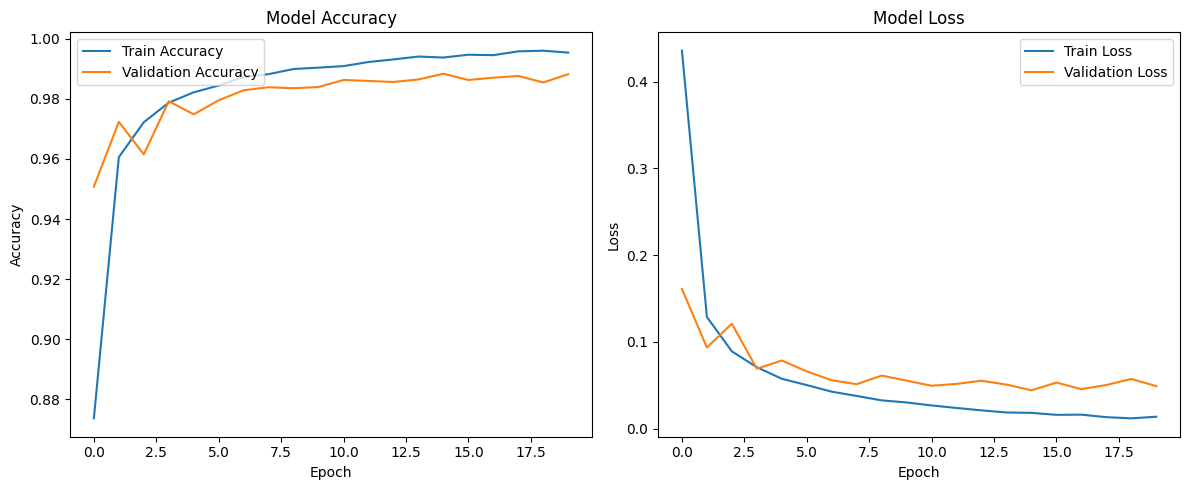

In [6]:
# ## 5. Visualize the Training Process and Results

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


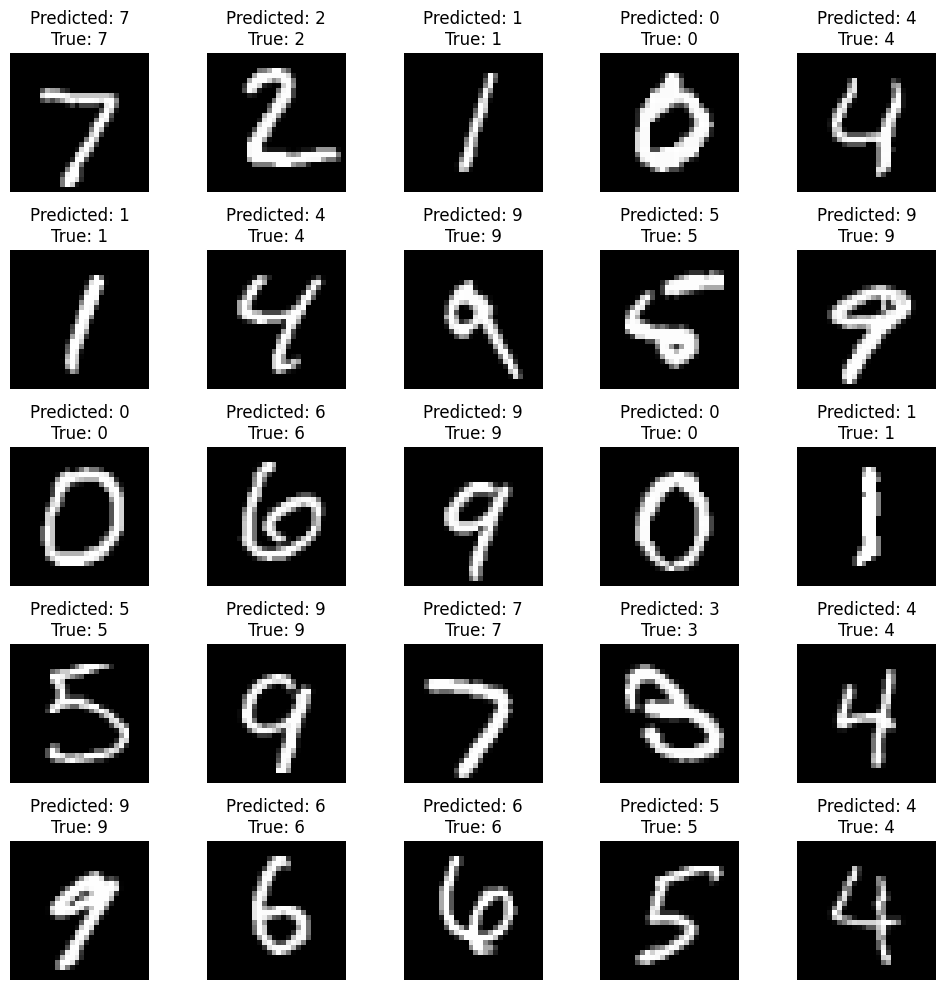

In [7]:
import numpy as np

predictions = lenet_model.predict(test_images[:25])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels[:25], axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()